# <font color='blue'>Visualização de Dados com Heatmaps e Visualização de Dados</font>

## Pacotes Python Para Manipulação de Dados e Visualização

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
# Pacote wordcloud
!pip install -q wordcloud

In [3]:
# Manipulação de Dados
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Wordcloud
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Carregando os Dados

In [4]:
# Carrega os dados
titanic = pd.read_csv('datasets/titanic-train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Carrega os dados
covid = pd.read_csv('datasets/novel-corona-virus-2019-dataset-covid_19_data.csv')
covid

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
109377,109378,09/13/2020,Zaporizhia Oblast,Ukraine,2020-09-14 04:26:09,2347.0,33.0,1055.0
109378,109379,09/13/2020,Zeeland,Netherlands,2020-09-14 04:26:09,1135.0,72.0,0.0
109379,109380,09/13/2020,Zhejiang,Mainland China,2020-09-14 04:26:09,1280.0,1.0,1268.0
109380,109381,09/13/2020,Zhytomyr Oblast,Ukraine,2020-09-14 04:26:09,4292.0,82.0,2352.0


In [6]:
# Carrega os dados
world = pd.read_csv('datasets/world-university-rankings-cwurData.csv')
world

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


### Heatmap

**Objetivo** : Exibir mapa de calor de várias séries temporais. 

Quantas mortes suspeitas de Covid ocorreram no Brasil, EUA e Canada no mês anterior?

In [8]:
# Prepara os dados
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

days_before = (date.today() - timedelta(days = 360)).isoformat()

last_month_df = covid[(covid['ObservationDate'] > days_before) & ((covid['Country/Region']=='US') | (covid['Country/Region']=='Brazil') | (covid['Country/Region']=='Canada'))]

country = last_month_df['Country/Region'].unique()

dates = pd.to_datetime(last_month_df['ObservationDate'].unique())

num_deaths=[]

for i in country:
    num_deaths.append(last_month_df[last_month_df['Country/Region']==i][['ObservationDate','Deaths']].groupby('ObservationDate').sum().reset_index()['Deaths'])


In [9]:
# Figura
fig = go.Figure(data = go.Heatmap(z = num_deaths,
                                  x = dates,
                                  y = country,
                                  colorscale = 'Viridis'))

# Layout
fig.update_layout(title = 'Mortes Por Suspeita de Covid nos Últimos 30 Dias', xaxis_nticks = 30)

# Gráfico
fig.show()

### Wordcloud

**Objetivo** : Exibir as palavras de uma coluna com o tamanho representando a frequência.

Quais países tem mais universidades avaliadas no dataset de avaliações de universidades?

In [12]:
# Colunas
world.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [13]:
# Extrai a coluna com os países
df = world.country
df.head(10)

0               USA
1               USA
2               USA
3    United Kingdom
4               USA
5               USA
6    United Kingdom
7               USA
8               USA
9               USA
Name: country, dtype: object

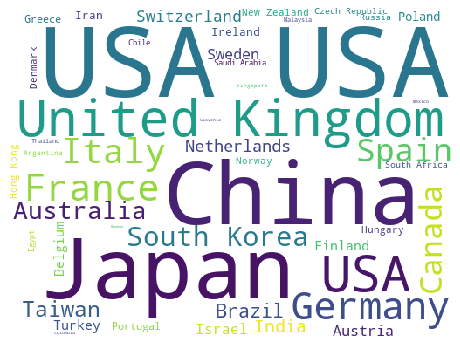

In [15]:
# Figura
plt.subplots(figsize = (8,8))

# Wordcloud
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 384).generate(' '.join(df))

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()